# Lab 2: Суміщення зображень на основі використання дескрипторів

## Variant 4

In [1]:
import math
import cv2

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm
from google.colab.patches import cv2_imshow

### Images

In [2]:
image1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CV/image1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CV/image2.png', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CV/image3.png', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CV/image4.png', cv2.IMREAD_GRAYSCALE)

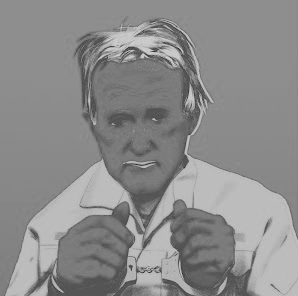

In [3]:
cv2_imshow(image1)

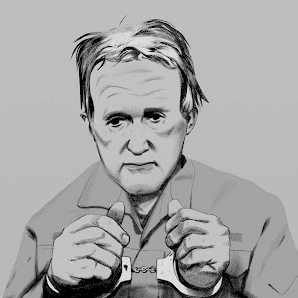

In [4]:
cv2_imshow(image2)

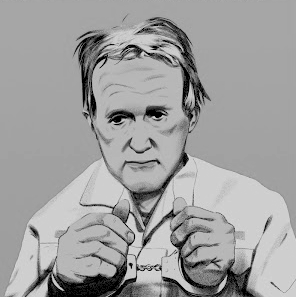

In [5]:
cv2_imshow(image3)

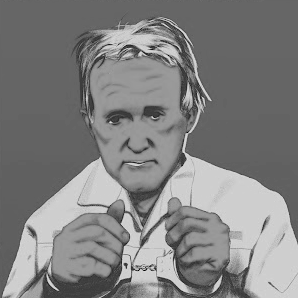

In [6]:
cv2_imshow(image4)

### Functions

#### Daisy

In [7]:
def daisy(img):
    detector = cv2.FastFeatureDetector_create()
    daisy = cv2.xfeatures2d.DAISY_create()

    kps = detector.detect(img)

    return daisy.compute(img, kps)

#### OpenCV BFM

In [8]:
def cv2_BFM(kp1, des1, kp2, des2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.match(des1,des2)

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:20], None, flags=2)

    cv2_imshow(output_image)

#### Custom BFM

In [9]:
def custom_BFM(kp1, des1, kp2, des2, img1, img2):
    matches = []

    for i, k1 in enumerate(des1):
        min_distance = 9999
        min_index = 0

        for j, k2 in enumerate(des2):
            distance = np.sum(np.abs(k1 - k2))

            if(distance < min_distance):
              min_distance = distance
              min_index = j

        matches.append(cv2.DMatch(_distance=min_distance, _imgIdx=0, _queryIdx=i, _trainIdx=min_index))

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:20], None, flags=2)

    cv2_imshow(output_image)

### Results

In [10]:
kp1, desc1 = daisy(image1)
kp2, desc2 = daisy(image2)
kp3, desc3 = daisy(image3)
kp4, desc4 = daisy(image4)

#### OpenCV (built-in) Brut-Force Matcher

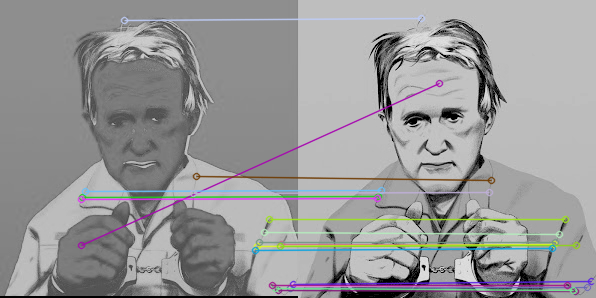

In [11]:
cv2_BFM(kp1, desc1, kp2, desc2, image1, image2)

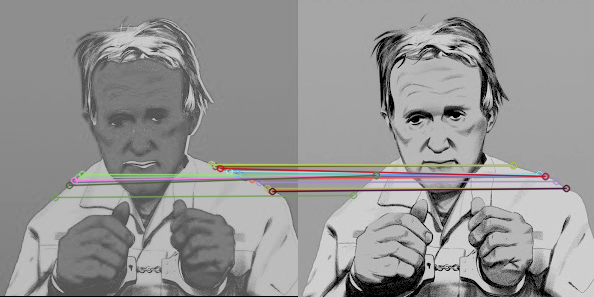

In [12]:
cv2_BFM(kp1, desc1, kp3, desc3, image1, image3)

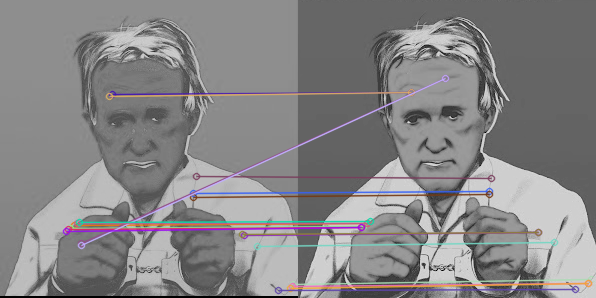

In [13]:
cv2_BFM(kp1, desc1, kp4, desc4, image1, image4)

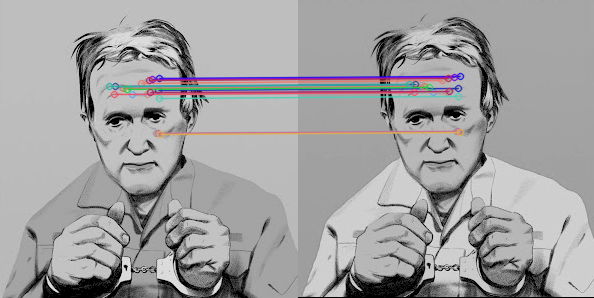

In [14]:
cv2_BFM(kp2, desc2, kp3, desc3, image2, image3)

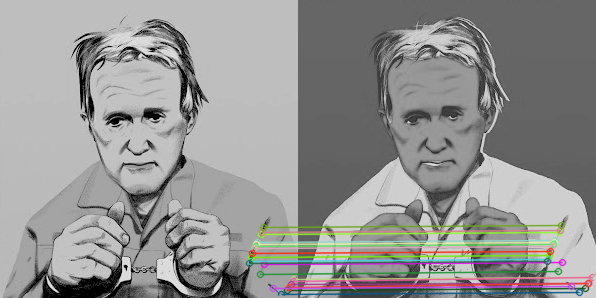

In [15]:
cv2_BFM(kp2, desc2, kp4, desc4, image2, image4)

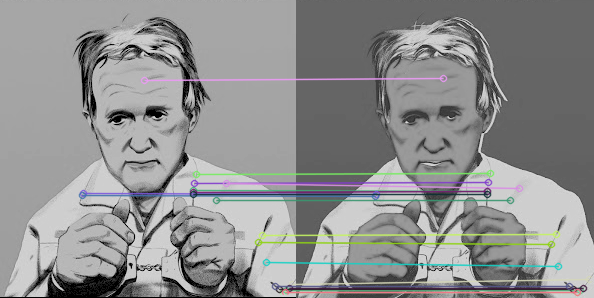

In [16]:
cv2_BFM(kp3, desc3, kp4, desc4, image3, image4)

#### Custom Brut-Force Matcher

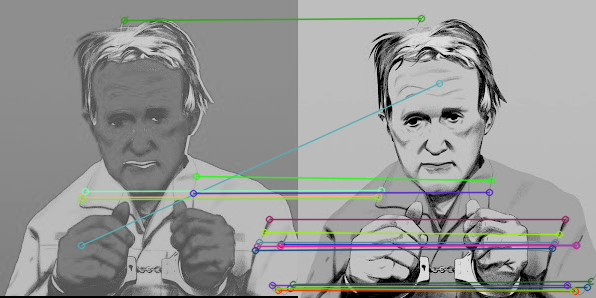

In [17]:
custom_BFM(kp1, desc1, kp2, desc2, image1, image2)

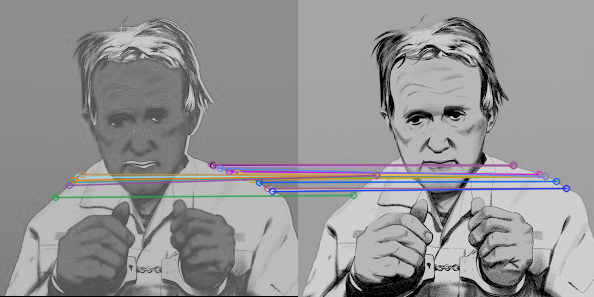

In [18]:
custom_BFM(kp1, desc1, kp3, desc3, image1, image3)

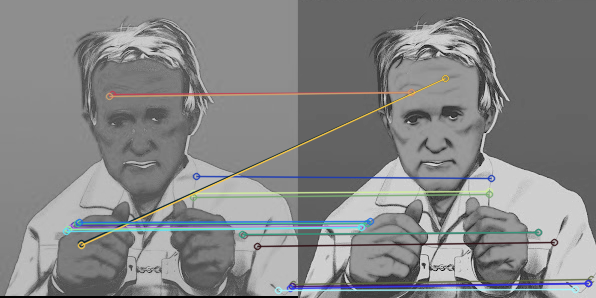

In [19]:
custom_BFM(kp1, desc1, kp4, desc4, image1, image4)

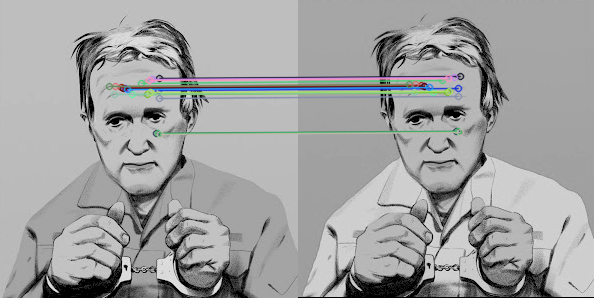

In [20]:
custom_BFM(kp2, desc2, kp3, desc3, image2, image3)

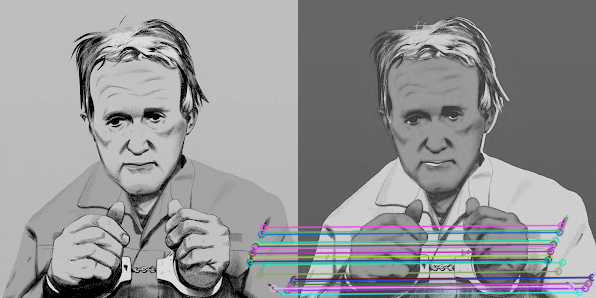

In [21]:
custom_BFM(kp2, desc2, kp4, desc4, image2, image4)

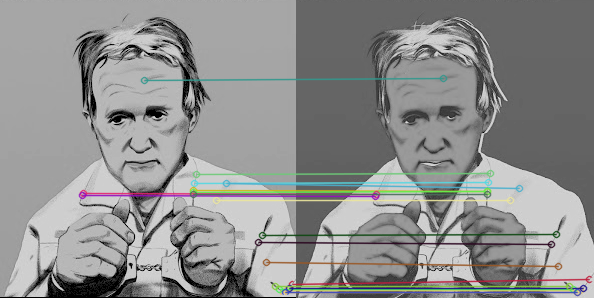

In [22]:
custom_BFM(kp3, desc3, kp4, desc4, image3, image4)